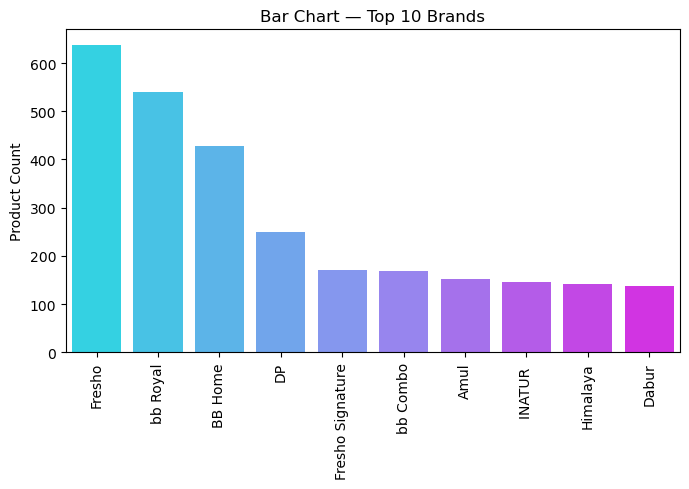

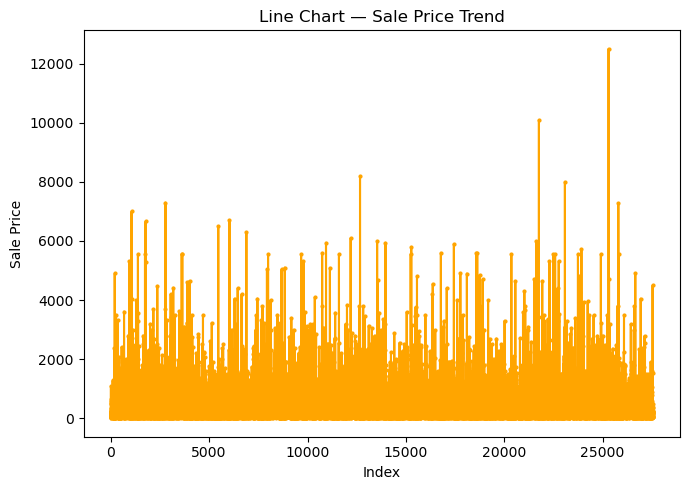

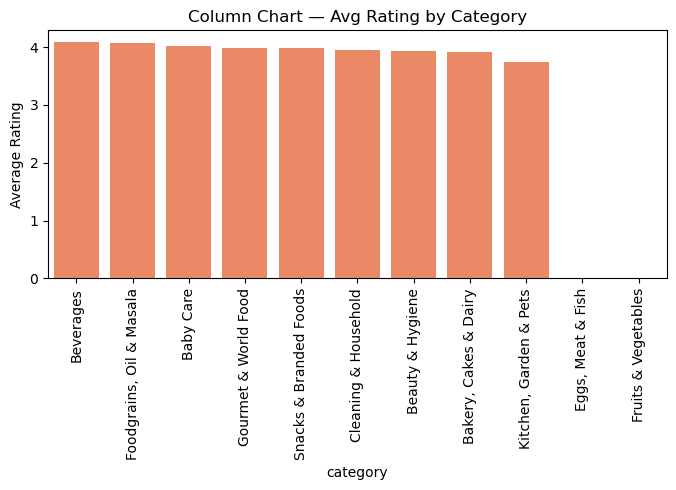

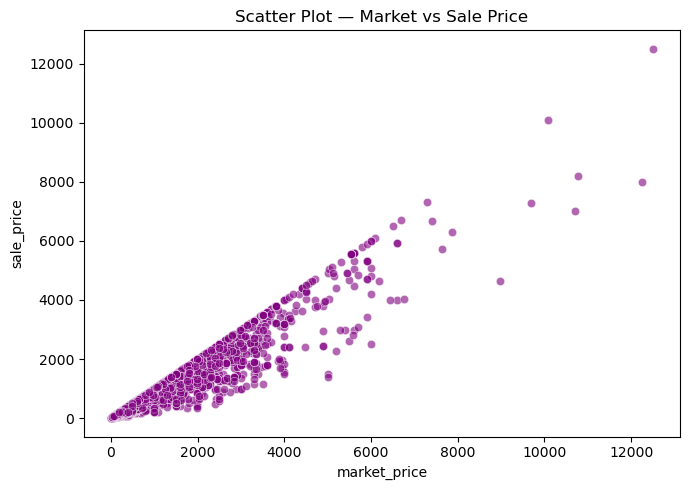

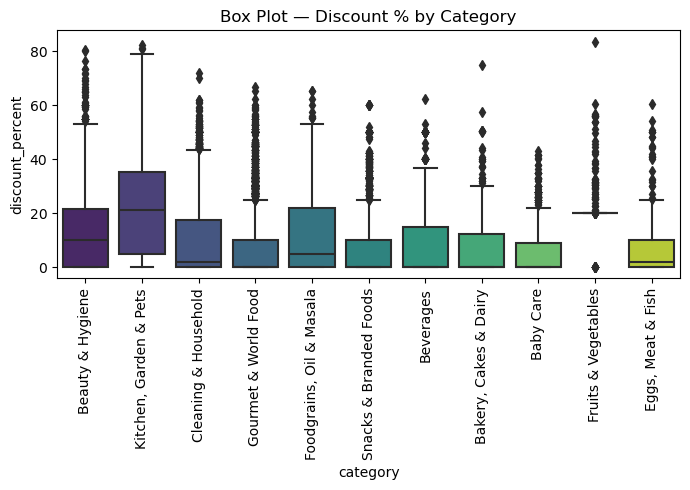

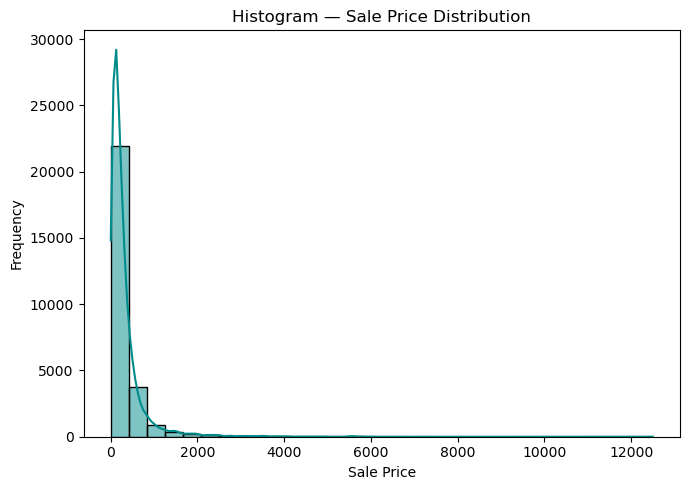

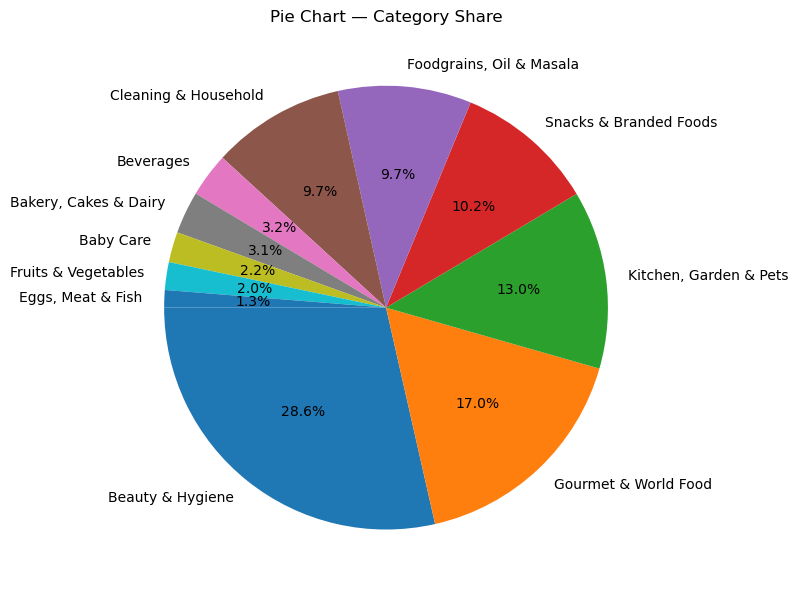

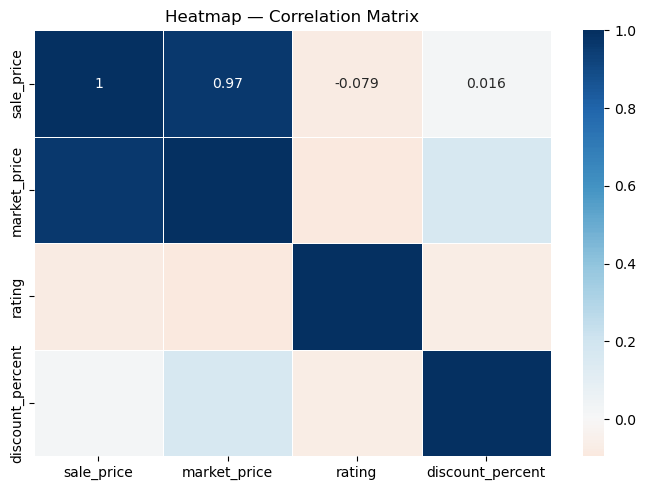

In [46]:
# 🛍️ BigBasket Products Sales Visualization Dashboard 

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Load CSV Dataset
df = pd.read_csv('C:/Users/ramit/OneDrive/Desktop/Mini_Project/BigBasket Products Analysis.csv')

# Clean & Prepare Data
df.columns = df.columns.str.lower().str.strip()

for col in ['sale_price', 'market_price', 'rating']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['discount_percent'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['sale_price', 'market_price'])

# KPI / Cards
total_products = len(df)
avg_rating = round(df['rating'].mean(), 2)
avg_discount = round(df['discount_percent'].mean(), 2)
avg_sale = round(df['sale_price'].mean(), 2)
avg_market = round(df['market_price'].mean(), 2)

display(HTML("<h1 style='text-align:center;color:#2E86C1;'>🛍️ BigBasket Product Sales Insights Dashboard</h1>"))
display(HTML(f"""
<div style="display:flex;justify-content:space-around;font-family:sans-serif;margin:20px 0;">
  <div style="padding:15px;border-radius:10px;background:#e8f4ff;width:15%;text-align:center;">
    <h4>📦 Total Products</h4><h3>{total_products}</h3>
  </div>
  <div style="padding:15px;border-radius:10px;background:#e8f4ff;width:15%;text-align:center;">
    <h4>⭐ Avg Rating</h4><h3>{avg_rating}</h3>
  </div>
  <div style="padding:15px;border-radius:10px;background:#e8f4ff;width:15%;text-align:center;">
    <h4>🛒 Avg Market Price</h4><h3>{avg_market}</h3>
  </div>
  <div style="padding:15px;border-radius:10px;background:#e8f4ff;width:15%;text-align:center;">
    <h4>🏷️ Avg Sales Price</h4><h3>{avg_sale}</h3>
  </div>
</div>
"""))

# Prepare Aggregations
brand_counts = df['brand'].value_counts().nlargest(10)
cat_counts = df['category'].value_counts()
avg_rating_cat = df.groupby('category')['rating'].mean().sort_values(ascending=False)
numeric_cols = ['sale_price', 'market_price', 'rating', 'discount_percent']

# Bar Chart - Top 10 Brands
plt.figure(figsize=(7,5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='cool')
plt.title('Bar Chart — Top 10 Brands')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Line Chart - Sale Price Trend
plt.figure(figsize=(7,5))
plt.plot(df['sale_price'].reset_index(drop=True), color='orange', marker='o', markersize=2)
plt.title('Line Chart — Sale Price Trend')
plt.ylabel('Sale Price')
plt.xlabel('Index')
plt.tight_layout()
plt.show()

# Column Chart - Avg Rating by Category
plt.figure(figsize=(7,5))
sns.barplot(x=avg_rating_cat.index, y=avg_rating_cat.values, color='coral')
plt.title('Column Chart — Avg Rating by Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter Plot - Market vs Sale Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='market_price', y='sale_price', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot — Market vs Sale Price')
plt.tight_layout()
plt.show()

# Box Plot - Discount % by Category
plt.figure(figsize=(7,5))
sns.boxplot(x='category', y='discount_percent', data=df, palette='viridis')
plt.title('Box Plot — Discount % by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histogram - Sale Price Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['sale_price'], bins=30, kde=True, color='darkcyan')
plt.title('Histogram — Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pie Chart - Category Share
plt.figure(figsize=(8,10))
plt.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('tab10'))
plt.title('Pie Chart — Category Share')
plt.tight_layout()
plt.show()

# Heatmap - Correlation Matrix
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='RdBu', center=0, linewidths=0.5)
plt.title('Heatmap — Correlation Matrix')
plt.tight_layout()
plt.show()
